In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
filename = "https://www.physi.uni-heidelberg.de/~reygers/lectures/2021/ml/data/magic04_data.txt"
df = pd.read_csv(filename, engine='python')


In [11]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [12]:
# use categories 1 and 0 insted of "g" and "h"
df['class'] = df['class'].map({'g': 1, 'h': 0})


df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### Data viz

In [13]:
df0 = df[df['class'] == 0] # hadron data set
df1 = df[df['class'] == 1] # gamma data set

print(len(df0),len(df1))

6688 12332


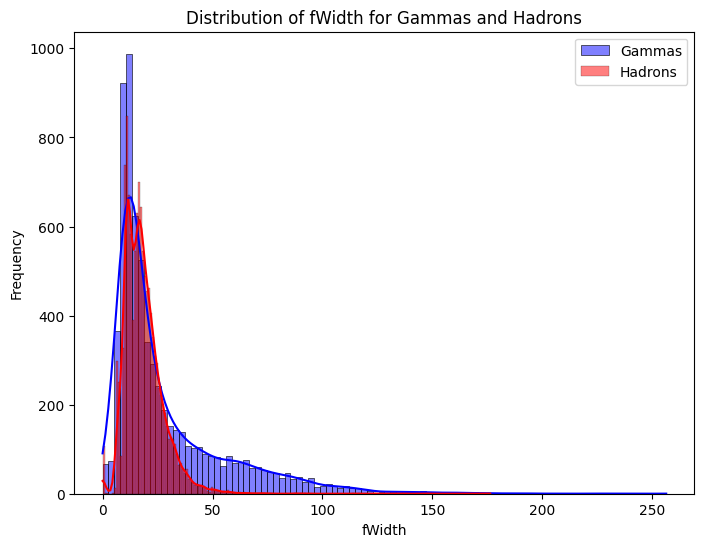

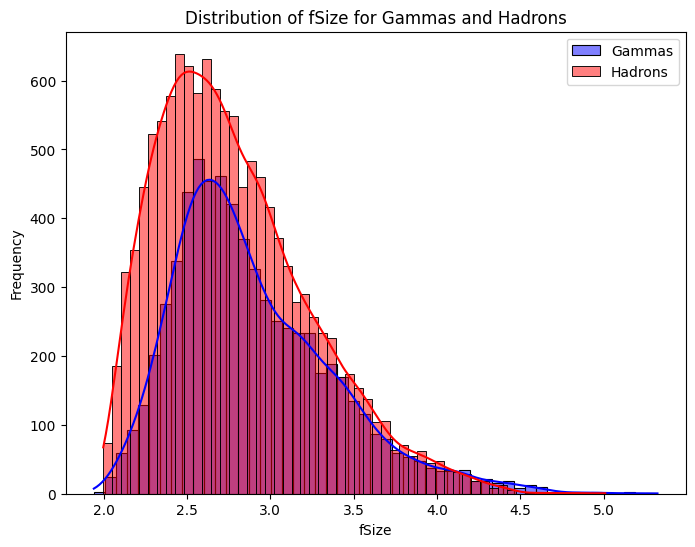

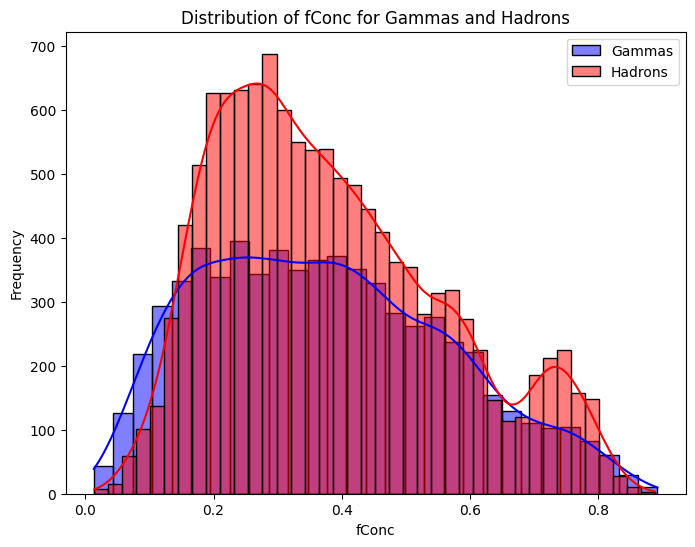

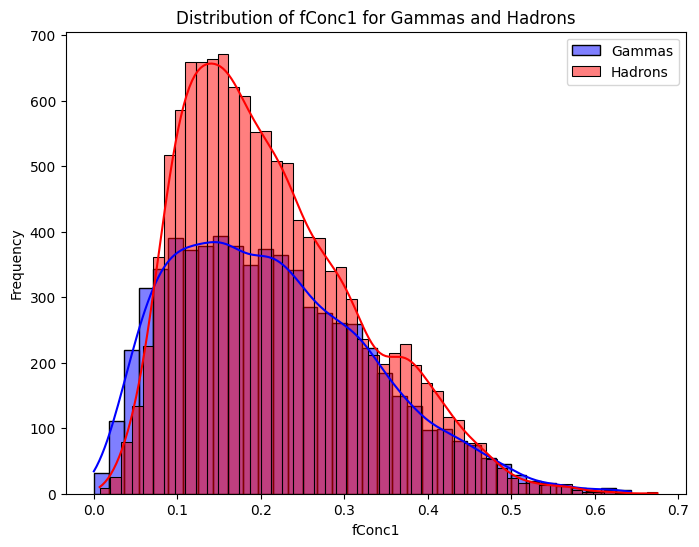

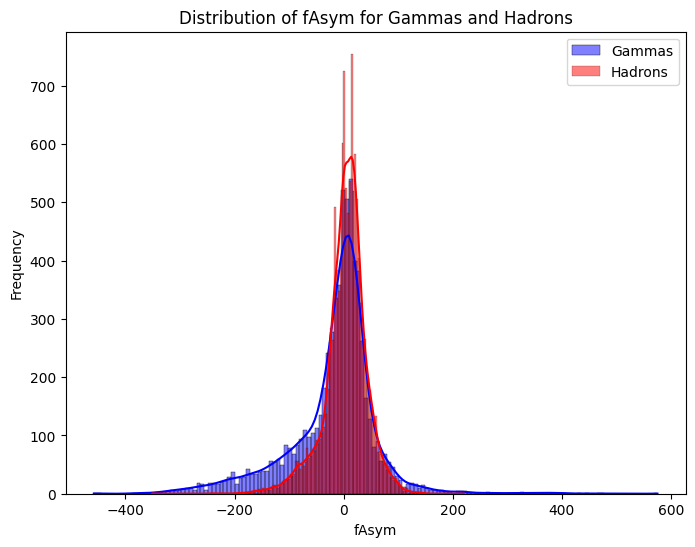

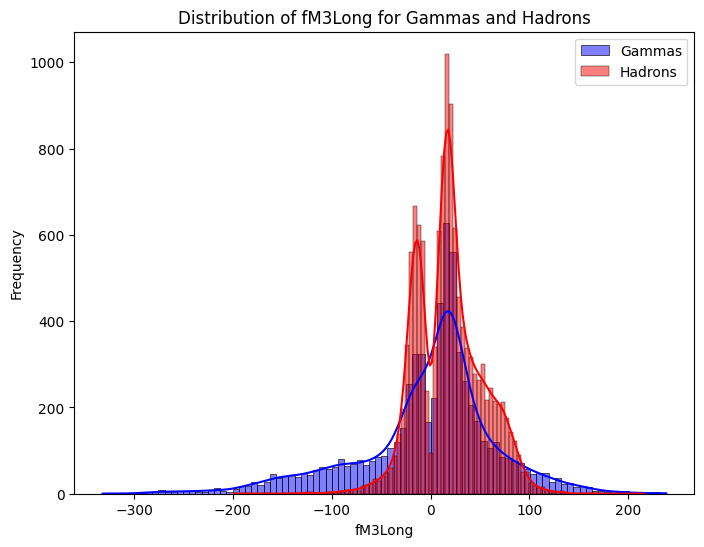

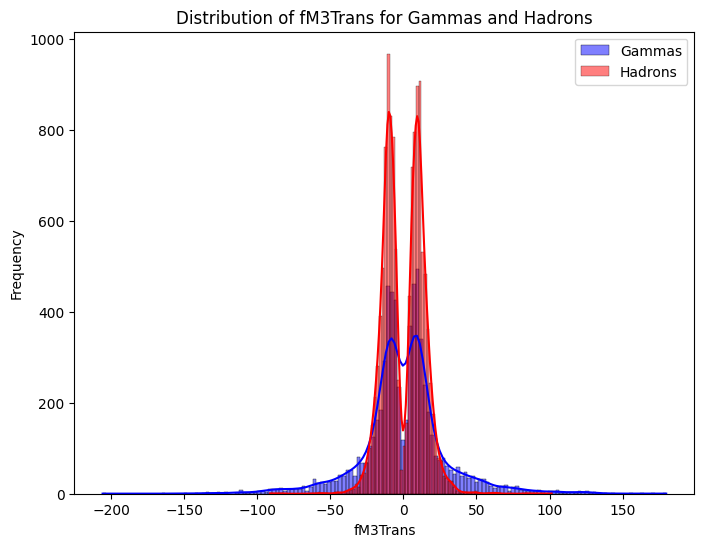

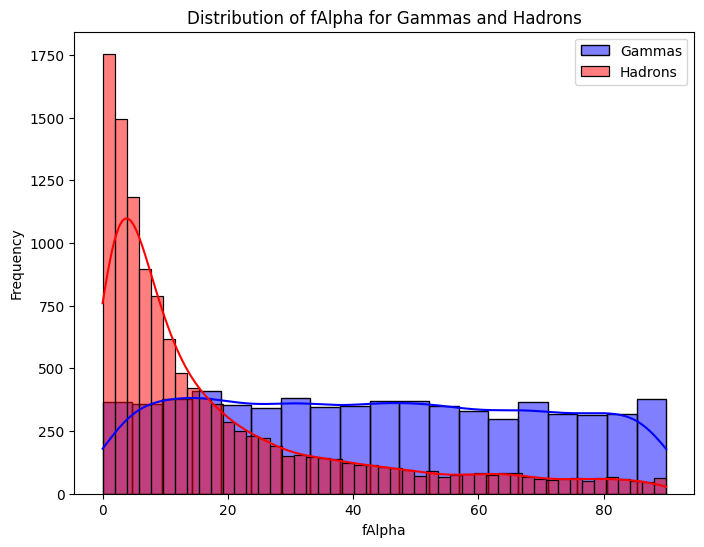

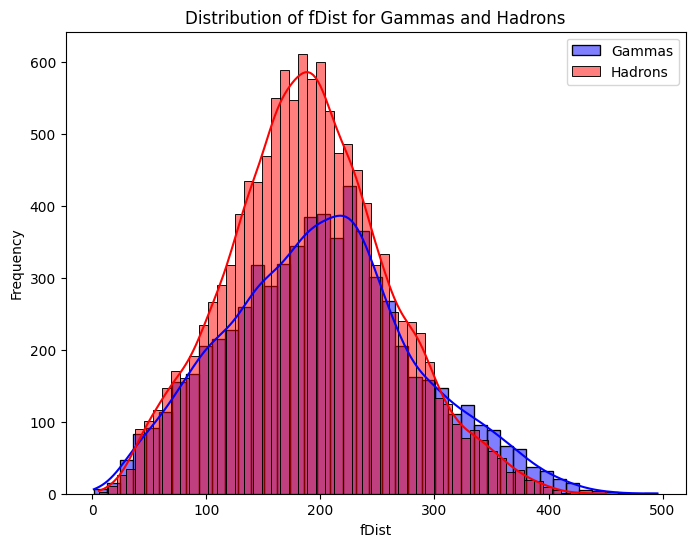

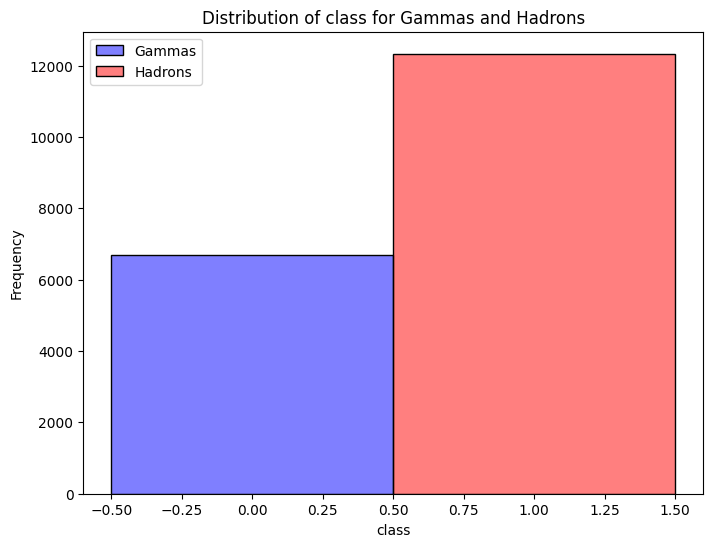

In [16]:
# List of variable names (assuming the first column is the target variable)
variable_names = df.columns[1:]  # Change the indexing if needed

# Plot each variable for gammas and hadrons overlaid
for var in variable_names:
    plt.figure(figsize=(8, 6))
    sns.histplot(df0[var], kde=True, color='blue', label='Gammas', alpha=0.5)
    sns.histplot(df1[var], kde=True, color='red', label='Hadrons', alpha=0.5)
    plt.title(f'Distribution of {var} for Gammas and Hadrons')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

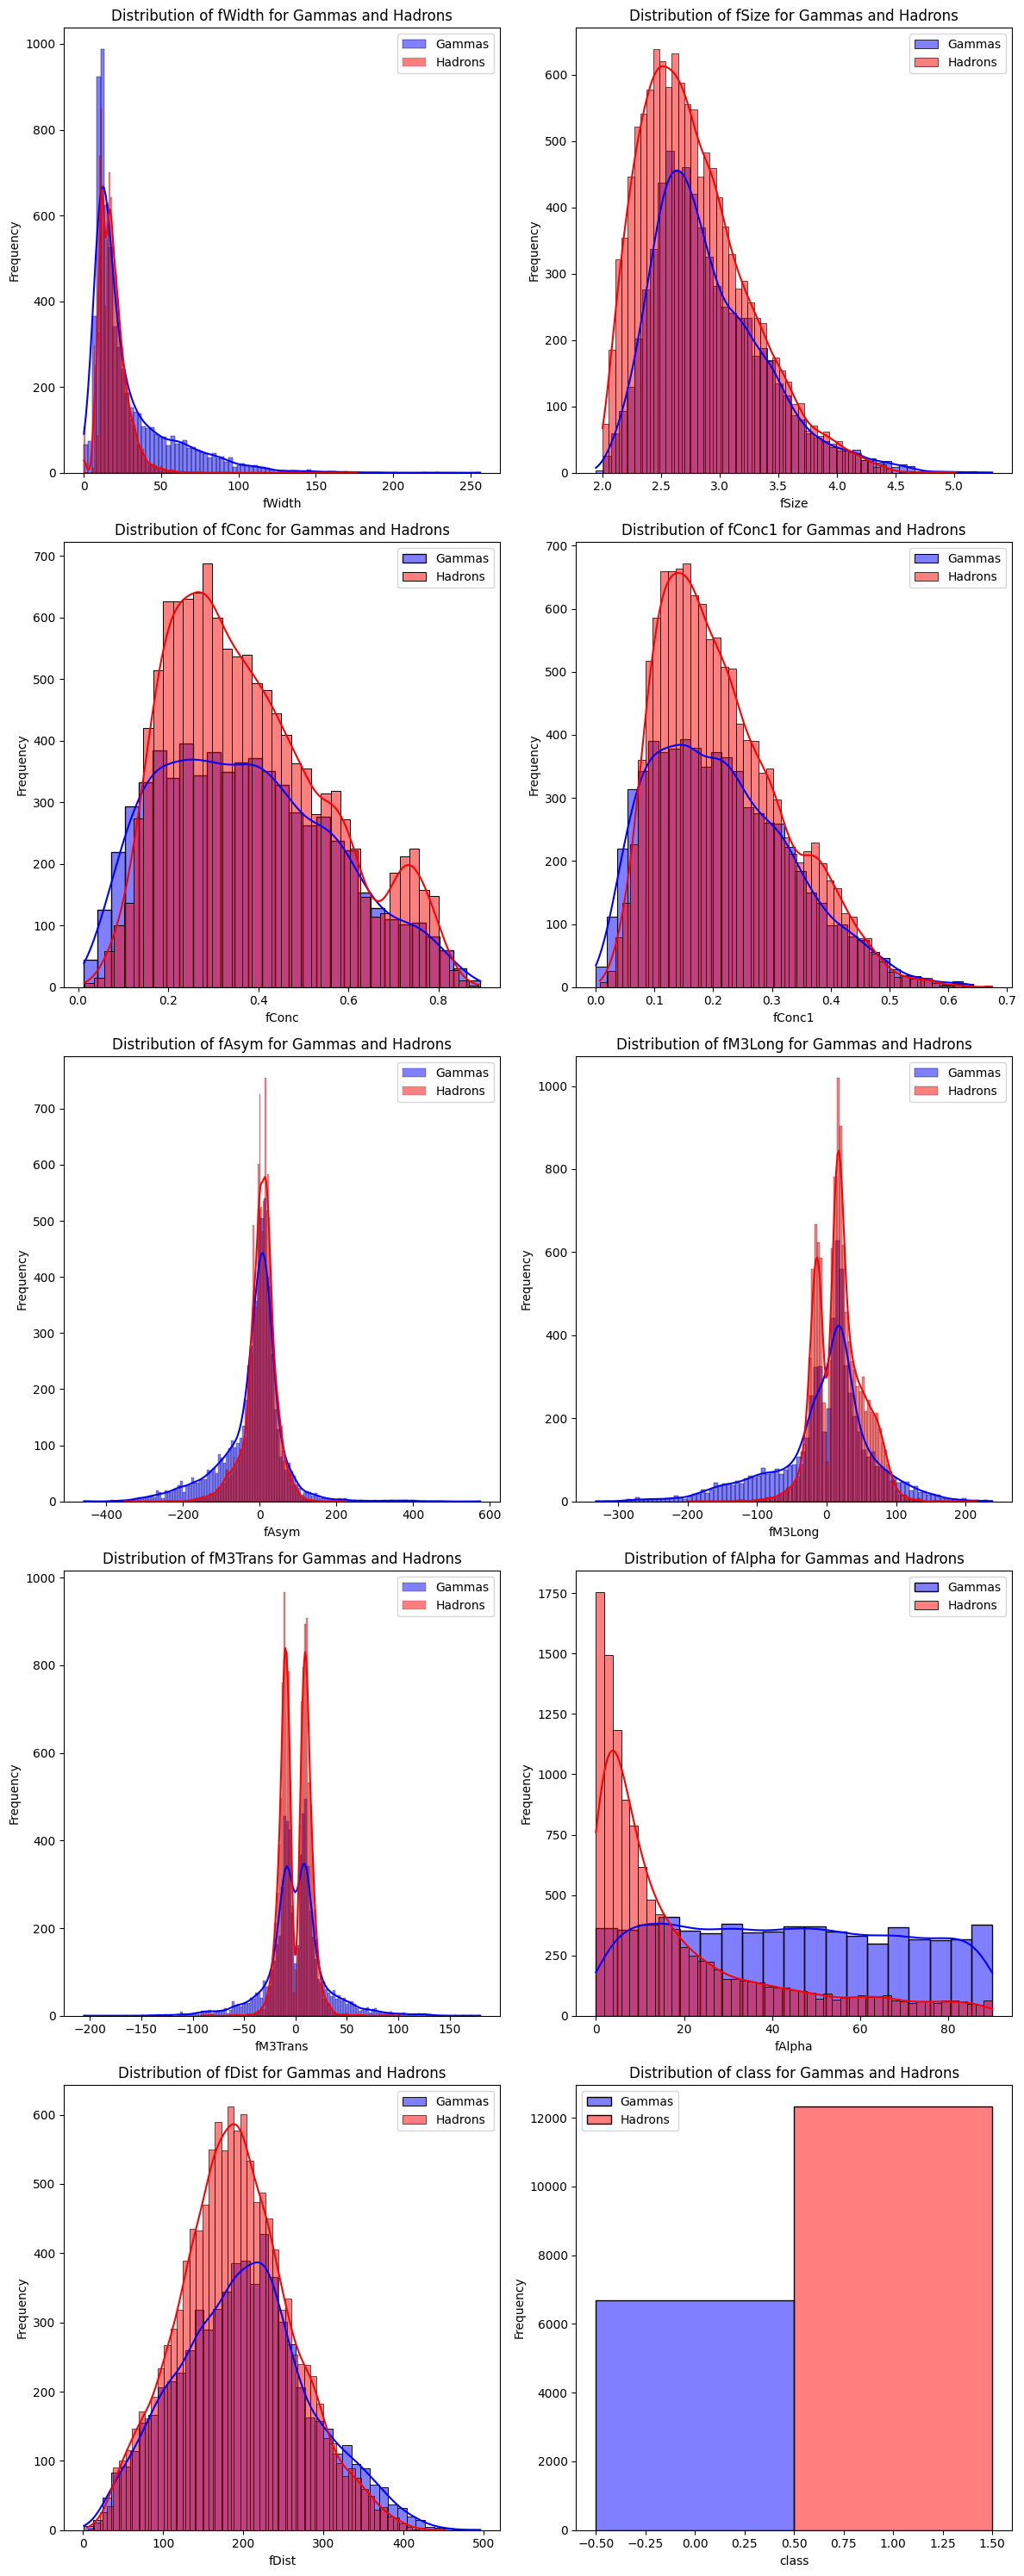

In [19]:
num_variables = len(variable_names)
num_rows = num_variables // 2 if num_variables % 2 == 0 else (num_variables // 2) + 1

# Create subplots for each variable
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6*num_rows))

for i, var in enumerate(variable_names):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.histplot(df0[var], kde=True, color='blue', label='Gammas', alpha=0.5, ax=ax)
    sns.histplot(df1[var], kde=True, color='red', label='Hadrons', alpha=0.5, ax=ax)
    
    ax.set_title(f'Distribution of {var} for Gammas and Hadrons')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Modeling Data Logestic Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


target = 'class'
features = df.columns[df.columns != target]

X= df[features].values
y= df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state= 123)
LGR = LogisticRegression(max_iter = 1000)
LGR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_train_pred = LGR.predict(X_train)
y_test_pred = LGR.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.58      0.66      2642
           1       0.80      0.90      0.85      4966

    accuracy                           0.79      7608
   macro avg       0.78      0.74      0.75      7608
weighted avg       0.78      0.79      0.78      7608



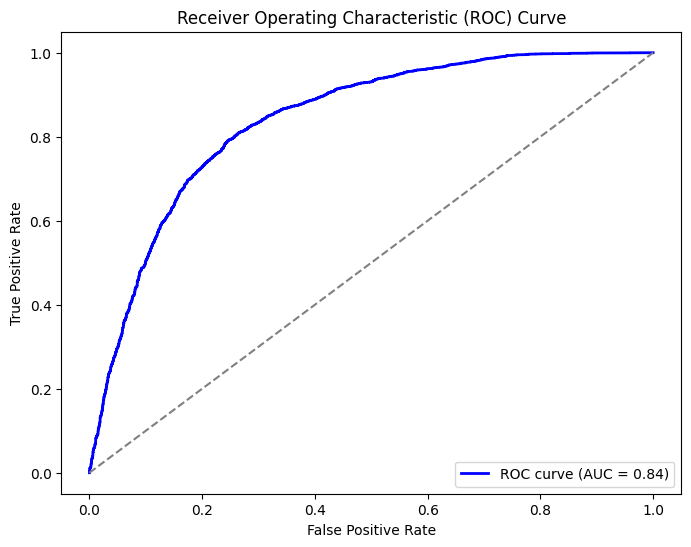

In [28]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for the positive class
y_probs = LGR.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Model

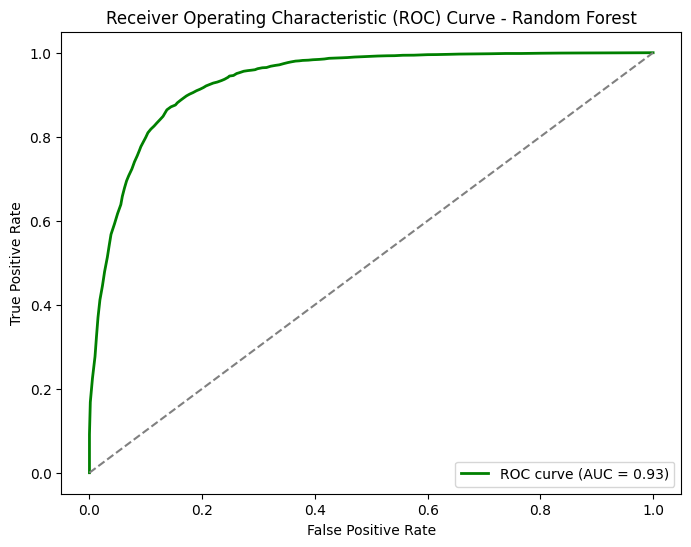

In [29]:
from sklearn.ensemble import RandomForestClassifier


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [30]:
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

In [31]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      2642
           1       0.88      0.93      0.91      4966

    accuracy                           0.88      7608
   macro avg       0.87      0.85      0.86      7608
weighted avg       0.87      0.88      0.87      7608

